In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # นำเข้า matplotlib
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
file_path = "diabetes_prediction_dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
# แสดงข้อมูลเบื้องต้นของชุดข้อมูล
print("Dataset Information:") #ข้อมูลชุดข้อมูล
print(df.info())
print("\nFirst 5 rows:") #ตัวอย่างข้อมูล 5 แถวแรก
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

First 5 rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.

In [ ]:
# ตรวจสอบค่าที่หายไปในข้อมูล
print("\nMissing Values:")#ตรวจสอบค่าที่หายไปในชุดข้อมูล
print(df.isnull().sum())


Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


<Figure size 1200x600 with 0 Axes>

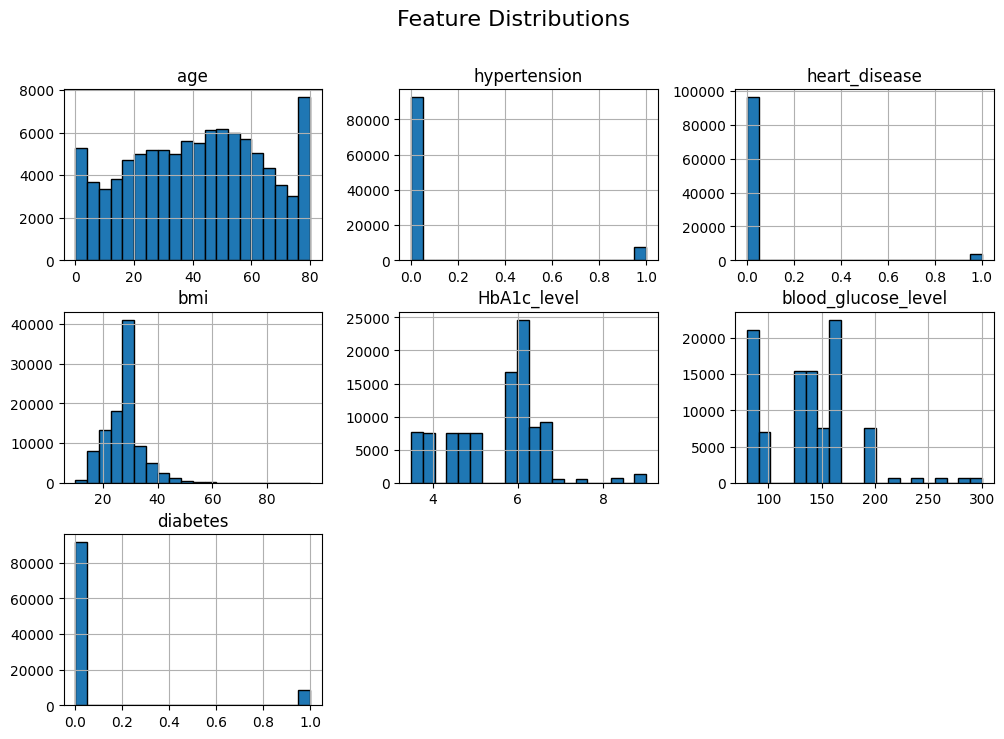

In [ ]:
# แสดงการกระจายของข้อมูลแต่ละตัวแปร
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 8), edgecolor='k')
plt.suptitle("Feature Distributions", fontsize=16)#การกระจายของค่าตัวแปรต่างๆ
plt.show()

In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ["gender", "smoking_history"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
# Define features and target
X = df.drop(columns=["diabetes"])
y = df["diabetes"]


In [ ]:
# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate models
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_knn = classification_report(y_test, y_pred_knn)



In [ ]:
# Print results
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print("KNN Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_knn)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.9614
KNN Classification Report:
Accuracy: 0.96135
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.89      0.62      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
 [[18164   128]
 [  645  1063]]


In [ ]:
# บันทึกโมเดลที่ฝึกแล้ว
joblib.dump(knn_model, "knn_model.pkl")

# ดาวน์โหลดไฟล์โมเดล
from google.colab import files
files.download('knn_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Train SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate models
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_svm = classification_report(y_test, y_pred_svm)


In [ ]:
# Print results
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("SVM Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_svm)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

SVM Accuracy: 0.9624
SVM Classification Report:
Accuracy: 0.96235
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.98      0.57      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.97      0.79      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
 [[18164   128]
 [  645  1063]]


In [ ]:
# บันทึกโมเดลที่ฝึกแล้ว
joblib.dump(svm_model, "svm_model.pkl")

# ดาวน์โหลดไฟล์โมเดล
from google.colab import files
files.download('svm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>